In [8]:

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.gam.api import GLMGam, BSplines

import pandas as pd

df_reviews = pd.read_csv('../data/movie_reviews_processed.csv')
df_happiness = pd.read_csv('../data/world_happiness_2018.csv')




<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        happiness_score   No. Observations:                  112
Model:                         GLMGam   Df Residuals:                   103.00
Model Family:                Gaussian   Df Model:                         8.00
Link Function:               Identity   Scale:                         0.38282
Method:                         PIRLS   Log-Likelihood:                -100.46
Date:                Sun, 31 Mar 2024   Deviance:                       39.430
Time:                        14:08:25   Pearson chi2:                     39.4
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9093
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.6407      0.967      0.662      0.508      -1.255       2.536
healthy_life_expectancy_at_birth        0.0801      0.010      8.416      0.000       0.061       0.099
healthy_life_expectancy_at_birth_s0     0.3574      0.948      0.377      0.706      -1.501       2.216
healthy_life_expectancy_at_birth_s1    -2.0864      0.605     -3.448      0.001      -3.272      -0.900
healthy_life_expectancy_at_birth_s2    -0.4160      0.637     -0.653      0.514      -1.665       0.833
healthy_life_expectancy_at_birth_s3    -0.5786      0.420     -1.378      0.168      -1.402       0.245
healthy_life_expectancy_at_birth_s4    -0.2643      0.486     -0.543      0.587      -1.218       0.689
healthy_life_expectancy_at_birth_s5     0.5566      0.594      0.936      0.349      -0.608       1.722
healthy_life_expectancy_at_birth_s6     0.5079      0.555      0.915      0.360      -0.580       1.596
healthy_life_expectancy_at_birth_s7    -0.7452      0.575     -1.296      0.195      -1.872       0.381
=======================================================================================================
"""

## GAM

In [ ]:
bs = BSplines(df_happiness['healthy_life_expectancy_at_birth'], df=[9], degree=[3])

gam_happiness = GLMGam.from_formula(
  'happiness_score ~ healthy_life_expectancy_at_birth', 
  smoother = bs,
  data = df_happiness
)
  
gam_happiness_result = gam_happiness.fit()
gam_happiness_result.summary()

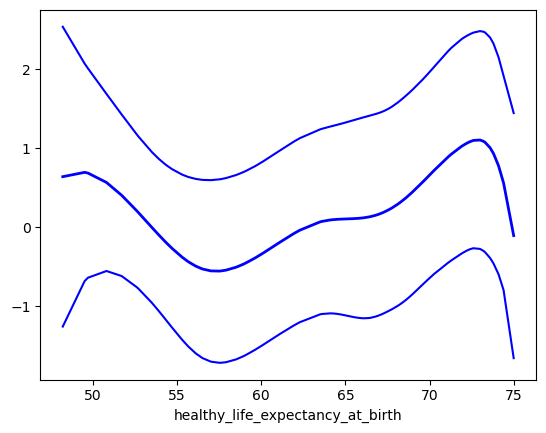

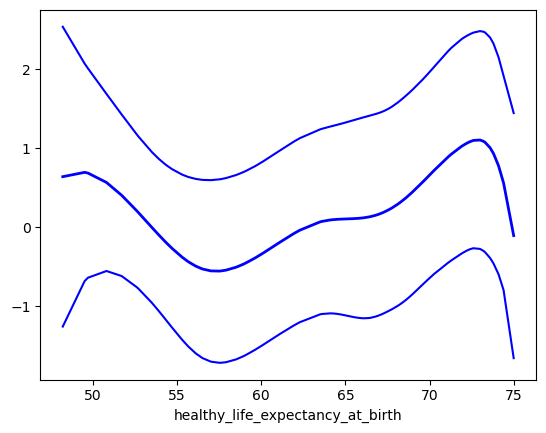

In [3]:
gam_happiness_result.plot_partial(0)

## Mixed effects

In [4]:

import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

fit_ran_int = sm.MixedLM.from_formula(
  "rating ~ length_minutes_sc", 
  df_reviews, 
  re_formula= '1',
  groups=df_reviews["genre"]
)

fit_ran_int = fit_ran_int.fit()

fit_ran_int.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:              MixedLM  Dependent Variable:  rating   
No. Observations:   1000     Method:              REML     
No. Groups:         8        Scale:               0.3075   
Min. group size:    49       Log-Likelihood:      -845.7437
Max. group size:    300      Converged:           Yes      
Mean group size:    125.0                                  
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         2.981    0.101 29.401 0.000  2.782  3.180
length_minutes_sc 0.085    0.018  4.672 0.000  0.049  0.120
Group Var         0.078    0.079                           
===========================================================

"""

In [5]:
fit_ran_slope = sm.MixedLM.from_formula(
  "rating ~ length_minutes_sc ", 
  df_reviews, 
  re_formula= 'length_minutes_sc',
  groups=df_reviews["genre"]  
  )

fit_ran_slope = fit_ran_slope.fit(method = 'lbfgs')

fit_ran_slope.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                   MixedLM      Dependent Variable:      rating   
No. Observations:        1000         Method:                  REML     
No. Groups:              8            Scale:                   0.3031   
Min. group size:         49           Log-Likelihood:          -843.4733
Max. group size:         300          Converged:               Yes      
Mean group size:         125.0                                          
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      2.974    0.107 27.724 0.000  2.764  3.184
length_minutes_sc              0.081    0.043  1.877 0.060 -0.004  0.165
Group Var                      0.088    0.089                           
Group x length_minutes_sc Cov -0.007    0.027                           
length_minutes_sc Var          0.010    0.016                           
========================================================================

"""

In [6]:
pd.DataFrame(fit_ran_slope.random_effects).T

,Group,length_minutes_sc
Action/Adventure,-0.135092,-0.013000
Comedy,0.482774,-0.149547
Drama,0.387509,0.012703
Horror,-0.094894,0.064669
Kids,-0.339572,-0.033218
Other,-0.070260,0.062250
Romance,0.007636,0.120674
Sci-Fi,-0.238101,-0.064531


## Quantile

In [9]:
model_median = smf.quantreg('rating ~ word_count_sc',  data = df_reviews)
model_median = model_median.fit(q = .5)

model_median.summary()     

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                 rating   Pseudo R-squared:               0.1247
Model:                       QuantReg   Bandwidth:                      0.2375
Method:                 Least Squares   Sparsity:                        1.221
Date:                Sun, 31 Mar 2024   No. Observations:                 1000
Time:                        14:09:11   Df Residuals:                      998
                                        Df Model:                            1
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.0886      0.019    160.023      0.000       3.051       3.126
word_count_sc    -0.2852      0.019    -14.770      0.000      -0.323      -0.247
=================================================================================
"""

In [22]:
def quantile_loss(par, X, y, tau):
  linear_parameters = X.dot(par)
  
  residual = y - linear_parameters
  
  loss = np.where(
    residual < 0, 
    (tau-1)*residual, 
    tau*residual
  )
  
  return sum(loss)


In [23]:
from scipy.optimize import minimize
import numpy as np

X = pd.DataFrame(
  {'intercept': 1, 
  'word_count_sc': df_reviews['word_count_sc']}
)
y = df_reviews['rating']

minimize(
  quantile_loss, 
  x0 = np.array([0, 0]), 
  args = (X, y, .5)
  ).x

array([ 3.09011343, -0.28416408])